# Online Retail transactions

The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. 
The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each 
transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where 
each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, 
and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, 
as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.

Column Descriptors
StockCode: A code used to identify the product that was purchased

Description: A brief description of the product that was purchased

Quantity: The quantity of the product that was purchased

InvoiceDate: The date and time that the purchase was made

UnitPrice: The price of one unit of the product that was purchased

CustomerID: The unique identifier for the customer who made the purchase

Country: The country where the customer who made the purchase is located

# Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
#Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)

# Reading Data Csv File

In [2]:
df=pd.read_csv("Online Retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
#checking dublicate value
df.duplicated().sum()

5268

In [6]:
print(f"{df.duplicated().mean()*100}%")

0.9721189350979592%


In [7]:
# droping Duplicated values
df.drop_duplicates(inplace = True)

# Data cleaning 

# Handling missing values

In [8]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [9]:
df.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002709
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

In [10]:
df.isnull().mean().sort_values(ascending=False)

Description    0.002709
InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

In [11]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [12]:
(df.isnull().mean().sort_values(ascending=False)[0:3])*100

Description    0.270945
InvoiceNo      0.000000
StockCode      0.000000
dtype: float64

# Checking Unique values of the columns

In [13]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2357
REGENCY CAKESTAND 3 TIER               2189
JUMBO BAG RED RETROSPOT                2156
PARTY BUNTING                          1720
LUNCH BAG RED RETROSPOT                1625
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY           1
SET 36 COLOURING PENCILS DOILEY           1
 I LOVE LONDON MINI RUCKSACK              1
found some more on shelf                  1
Name: Description, Length: 4223, dtype: int64

In [14]:
# Handling Null values 
df["Description"].fillna(df.Description.mode()[0],inplace= True)

Here we replaced null of Description column with the mode values. Mode value is the most repeated value of the column.

In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15282.630153
std,219.130156,97.233118,1482.756881
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


<AxesSubplot:>

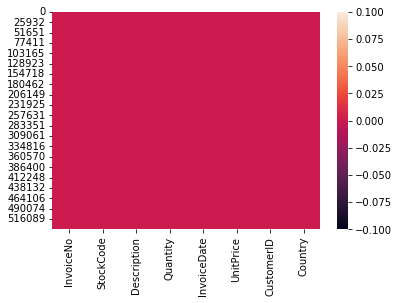

In [17]:
sns.heatmap(df.isna())

In [18]:
df.dropna(inplace = True)

In [19]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [20]:
for i in df.columns:
    print(f"------------{i}-----------------------")
    print(df[i].value_counts())
    print("-----------------------------------------")

------------InvoiceNo-----------------------
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
570518        1
C550935       1
550937        1
550940        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64
-----------------------------------------
------------StockCode-----------------------
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: StockCode, Length: 4070, dtype: int64
-----------------------------------------
------------Description-----------------------
WHITE HANGING HEART T-LIGHT HOLDER     3811
REGENCY CAKESTAND 3 TIER               2189
JUMBO BAG RED RETROSPOT                2156
PARTY BUNTING                          1720
LUNCH BAG RED RETROSPOT                1625
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY          

In [21]:
df['Year'] = pd.to_datetime(df["InvoiceDate"]).dt.year
df['Month'] = pd.to_datetime(df["InvoiceDate"]).dt.month_name()
df['Week'] = pd.to_datetime(df["InvoiceDate"]).dt.week
df['day'] = pd.to_datetime(df["InvoiceDate"]).dt.day
df['Weekday'] = pd.to_datetime(df["InvoiceDate"]).dt.weekday
df["Day_Name"] = pd.to_datetime(df["InvoiceDate"]).dt.day_name()

C:\Users\asus\AppData\Local\Temp\ipykernel_9864\192890578.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = pd.to_datetime(df["InvoiceDate"]).dt.week


In [22]:
# Create new column with time interval labels
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df['Time of Day'] = ['Early Morning' if x < 6 
                     else ('Morning' if x < 12 
                           else ('Noon' if x < 14 
                                 else ('Afternoon' if x < 18 
                                       else ('Evening' if x < 22 else 'Night')))) for x in df['Time']]

# Create a Sales Columns

In [23]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df['Sales'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Sales, dtype: float64

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,day,Weekday,Day_Name,Time,Time of Day,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,December,48,1,2,Wednesday,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,48,1,2,Wednesday,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,December,48,1,2,Wednesday,8,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,48,1,2,Wednesday,8,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,48,1,2,Wednesday,8,Morning,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,December,49,9,4,Friday,12,Noon,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,December,49,9,4,Friday,12,Noon,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,December,49,9,4,Friday,12,Noon,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,December,49,9,4,Friday,12,Noon,16.60


In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Week,day,Weekday,Time,Sales
count,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15282.630153,2010.921771,30.694116,15.024640,2.423889,13.077154,18.123861
std,219.130156,97.233118,1482.756881,0.268532,15.145369,8.663351,1.839870,2.447505,380.656263
min,-80995.000000,-11062.060000,12346.000000,2010.000000,1.000000,1.000000,0.000000,6.000000,-168469.600000
25%,1.000000,1.250000,14367.000000,2011.000000,18.000000,7.000000,1.000000,11.000000,3.750000
50%,3.000000,2.080000,15287.000000,2011.000000,34.000000,15.000000,2.000000,13.000000,9.870000
75%,10.000000,4.130000,16241.000000,2011.000000,45.000000,22.000000,4.000000,15.000000,17.400000
max,80995.000000,38970.000000,18287.000000,2011.000000,51.000000,31.000000,6.000000,20.000000,168469.600000


# Explaratory Data Analysis (EDA)

1.CustomerID with the highest Quantity

In [26]:
# sort the dataframe by Quantity in descending order
sorted_df = df.sort_values(by=['Quantity'], ascending=False)

# get the CustomerID with the highest Quantity
customer_id = sorted_df.iloc[0]['CustomerID']
highest_quantity = sorted_df.iloc[0]['Quantity']

print(f"CustomerID {customer_id}  bought the highest quantity of {highest_quantity}.")

CustomerID 16446  bought the highest quantity of 80995.


2.Top 10 customers by Quantity

In [27]:
cust_totals = df.groupby('CustomerID')['Quantity'].sum()

# sort the customer_totals by Quantity in descending order
sorted_totals = cust_totals.sort_values(ascending=False)

# get the top 10 customer IDs
top_10_customers = sorted_totals.head(10)

print("Top 10 Customers by Quantity:")
print(top_10_customers)

Top 10 Customers by Quantity:
CustomerID
15287    270083
14646    196719
12415     77242
14911     77155
17450     69009
18102     64122
17511     63012
13694     61899
14298     58021
14156     56908
Name: Quantity, dtype: int64


3.Plot top 10 customer by quantity

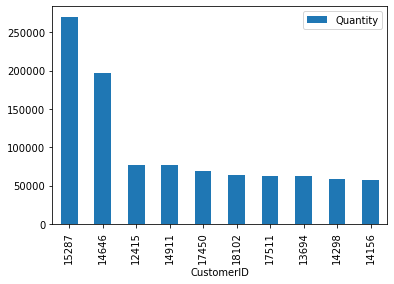

In [28]:
sorted_totals.head(10).plot(kind="bar")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


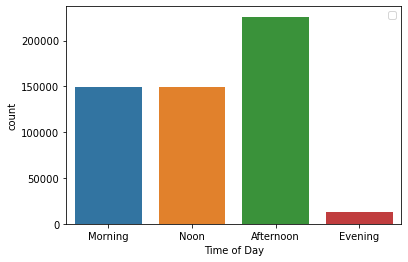

In [29]:
sns.countplot(data= df, x= "Time of Day")
plt.legend()
plt.show()

5.Time of Day pieChart

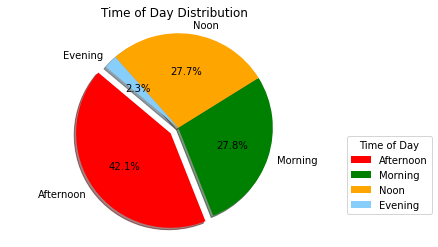

In [30]:
counts = df['Time of Day'].value_counts()

# Data
labels = counts.index.tolist()
sizes = counts.tolist()
colors = ['red', 'green', 'orange', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Time of Day Distribution')

plt.axis('equal')
plt.legend(title='Time of Day', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()
